In [107]:
from architeture_network import (Architeture)
from common import (limit_map, train_model, validate_on_df,
                    MEISmaps,get_noise_train,data_to_keras_format,plot_history,get_data_from_map)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
import os
import cv2
import time
import matplotlib.pyplot as plt
#import keras
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette('hls')
start = time.time()

In [108]:
def remove_noise(image):
    return cv2.medianBlur(image,5)

In [109]:
def real_data(path):
    data_teste_0 = get_data_from_map(path)
    df_temp = pd.DataFrame(data_teste_0)
    n_array = 689
    df = pd.DataFrame(columns = np.arange(0,n_array))
    values = []
    lag  = 12
    j = 0
    for i in range(int(df_temp.shape[0]/lag)):
        values.append(df_temp.iloc[j:j+lag].sum().tolist())
        j+=1
        
    df = df.append(values, ignore_index = True)
    return df
def get_energies():
    f = open(paths[0], 'r')
    lines = f.readlines()
    f.close()
    energies = []
    all_data = [line.split('\t') for line in lines]
    for line in all_data:
        if line[0] != '\n':
            energies.append(float(line[0]))
    
    return energies

def get_data_from_map(path):
    f = open(path, 'r')
    lines = f.readlines()
    f.close()         
    total_values_angles = [line.split('\t')[1:] for line in lines]
    k = 0
    for array in total_values_angles:
        new_array = []
        for i in range(len(array)):
            if array[i] != '\n':
                new_array.append(float(array[i]))
        total_values_angles[k] = new_array
        k+=1
    
    
    specs = {}
    lab = 'a'
    n = 0
    data_training = []
    for i in range(301):
        specs[lab + str(i)] = []
        for j in range(len(total_values_angles)):
            specs[lab + str(i)].append(total_values_angles[j][n])
        n+=1
        data_training.append(specs[lab+str(i)])
    data_training = np.array(data_training)
    return data_training[1:]
labels_rotulo = ['dL', 'thickness', 'frac_m1', 'frac_m2']
to_remove = ['output_dL_','thickness_', '_frac_m1','_frac_m2','.dat', 'EXPscan1_dL_','EXPscan2_dL_','EXPscan3_dL_','EXPscan4_dL_']
def get_rotulo_from_path(path):
    
    string_0 = path
    for pattern in to_remove:
        if pattern in string_0:
            string_0 = string_0.replace(pattern,'')
    values = string_0.split('_')    
    values = [float(v) for v in values]
    return values
def prepare_data_to_df(paths):
    n_array = 689
    df = pd.DataFrame(columns = np.arange(0,n_array))
    start_time = time.time()
    k = 0
    j = 0
    for path in zip(paths):
        data = get_data_from_map(path[0])
        data = data[1:]
        df1 = pd.DataFrame(data)
        df = df.append(df1, ignore_index = True)
        k+=1
        print("Restam {} mapas!".format(len(paths) - k))
    print("Tempo de execução de um mapa: {} s", (time.time() - start_time))
    return df

In [110]:
# input coomo dict
def get_df_from_maps(df):
    n_array = 689
    df = pd.DataFrame(columns = np.arange(0,n_array))
    start_time = time.time()
    k = 0

    datas = []
    rotulos = []
    for path in zip(paths):
        data = get_data_from_map(path[0])
        df1 = pd.DataFrame(data)
        values = []
    
        j = 0
        for i in range(int(df1.shape[0])):
            values.append(df1.iloc[j].tolist())
            rotulos.append(output['thickness'][k])
            j+=1
        
        df = df.append(values, ignore_index = True)
        k+=1
        datas.append(data)
        print("Restam {} mapas!".format(len(paths) - k))
    print("Tempo de execução de um mapa: {} s", (time.time() - start_time))
    df['thickness'] = rotulos
    return df

In [111]:
def get_img_from_map(names, path_padrao):
    labels = []
    values = []
    k = 0
    for name in names:
        path_final = os.path.join(path_padrao,name)
        info = get_rotulo_from_path(name)
        values.append(get_data_from_map(path_final))
        labels.append(info[1])
        k+=1
    return values,labels

In [112]:
def save_maps(values,labels,path_to_save):
    fig, ax = plt.subplots(figsize = (12,6))
    for k in range(len(values)):
        p = os.path.join(path_to_save,f"image_{k}_{labels[k]}.png")
        if not os.path.isfile(p):
            ax.imshow(values[k])
            ax.grid(False)
            ax.axis(False)
            fig.tight_layout()
            fig.savefig(p,quality=90,transparent=True)
        print(f"Restam {len(values) - k} de imagens para serem salvas!!", end = "\r")

In [113]:
"""url = r"MapasTeste"
save_teste = r"imgs_maps\validacao"
path_maps_validation = os.listdir(url)
data_valid = get_img_from_map(path_maps_validation,url)
save_maps(data_valid[0],data_valid[1],save_teste)
url = r"Mapa"
save_train = r"imgs_maps\train"
path_train = os.listdir(url)
data_valid = get_img_from_map(path_train,url)
save_maps(data_valid[0], data_valid[1], save_train)
url = r"data_barbara\Mapas_experimentais_(MEIS)"
save_real = r"imgs_maps\reais"
path_real = os.listdir(url)
data_valid = get_img_from_map(path_real,url)
save_maps(data_valid[0], data_valid[1],save_real)"""

'url = r"MapasTeste"\nsave_teste = r"imgs_maps\x0balidacao"\npath_maps_validation = os.listdir(url)\ndata_valid = get_img_from_map(path_maps_validation,url)\nsave_maps(data_valid[0],data_valid[1],save_teste)\nurl = r"Mapa"\nsave_train = r"imgs_maps\train"\npath_train = os.listdir(url)\ndata_valid = get_img_from_map(path_train,url)\nsave_maps(data_valid[0], data_valid[1], save_train)\nurl = r"data_barbara\\Mapas_experimentais_(MEIS)"\nsave_real = r"imgs_maps\reais"\npath_real = os.listdir(url)\ndata_valid = get_img_from_map(path_real,url)\nsave_maps(data_valid[0], data_valid[1],save_real)'

# -------------------------------------------------------

In [114]:
from tensorflow.keras.models import *
#from tensorflow.keras.layers import Concatenate, Dense, LSTM, Input, concatenate,Dropout,Flatten
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import random
from tensorflow.keras.utils import plot_model

In [115]:
def check_map(data,model):
    prediction = model.predict(np.array(data))
    return prediction

In [116]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [117]:
def treat_and_get_images(imgs,path_to_save):
    left_half_images = []
    right_half_images = []
    for i in imgs:
        path_final = os.path.join(path_to_save, i)
        image = load_img(path_final)
        image = img_to_array(image)
        image = imagenet_utils.preprocess_input(image)
        height, width, intensity = image.shape
        width_cutoff = width // 2
        resolution = (int(height/12), int(width_cutoff/6))
        left_half_image = image[:,:width_cutoff]
        right_half_image = image[:,width_cutoff:]
        left_half_image = cv2.resize(left_half_image, dsize=resolution, interpolation = cv2.INTER_CUBIC)
        right_half_image = cv2.resize(right_half_image, dsize=resolution, interpolation = cv2.INTER_CUBIC)
        left_half_images.append(left_half_image/255)
        right_half_images.append(right_half_image/255)
        
    return left_half_images,right_half_images,resolution

# ------------------------ DADOS DE TREINAMENTO ------------------------------------#


In [118]:
path_to_save = "imgs_maps\\train"
imgs = os.listdir(path_to_save)
rotulos = [float(im.split('_')[2].replace('.png','')) for im in imgs]
#left_half_X_to_train, right_half_X_to_train, resolution = treat_and_get_images(imgs,path_to_save)
analise_treino = []
left_half_X_to_train = []
right_half_X_to_train = []
for i in imgs:
    path_final = os.path.join(path_to_save, i)
    image = load_img(path_final)
    #image = img_to_array(image)
    image = np.array(image)
    analise_treino.append(image)
    #image = np.log(image)
    image = imagenet_utils.preprocess_input(image,mode="torch")
    
    height, width, intensity = image.shape
    width_cutoff = width // 2
    resolution = (int(height/12), int(width_cutoff/12))
    left_half_image = image[:,:width_cutoff]
    left_half_image = cv2.GaussianBlur(left_half_image, (5,5), 0.1)
    
    right_half_image = image[:,width_cutoff:]
    right_half_image = cv2.GaussianBlur(right_half_image, (5,5), 0.1)
    
    left_half_image = cv2.resize(left_half_image, dsize=resolution, interpolation = cv2.INTER_CUBIC)
    right_half_image = cv2.resize(right_half_image, dsize=resolution, interpolation = cv2.INTER_CUBIC)
    left_half_X_to_train.append(left_half_image)
    right_half_X_to_train.append(right_half_image)
    

# ------------------------------------------------------

In [119]:
path_valid = "imgs_maps\\validacao"
imgs2 = os.listdir(path_valid)
rotulos_valid = [float(im.split('_')[2].replace('.png','')) for im in imgs2]
#left_half_X_valid, right_half_X_valid, resolution = treat_and_get_images(imgs2,path_valid)
left_half_X_valid = []
right_half_X_valid = []
for i in imgs2:
    path_final = os.path.join(path_valid, i)
    image = load_img(path_final)
    #image = img_to_array(image)
    image = np.array(image)
    #image = np.log(image)
    image = imagenet_utils.preprocess_input(image,mode="torch")
    height, width, intensity = image.shape
    width_cutoff = width // 2
    resolution = (int(height/12), int(width_cutoff/12))
    left_half_image = image[:,:width_cutoff]
    right_half_image = image[:,width_cutoff:]
    left_half_image = cv2.resize(left_half_image, dsize=resolution, interpolation = cv2.INTER_CUBIC)
    right_half_image = cv2.resize(right_half_image, dsize=resolution, interpolation = cv2.INTER_CUBIC)
    left_half_X_valid.append(left_half_image)
    right_half_X_valid.append(right_half_image)

In [120]:
path_real = "imgs_maps\\reais"
imgs3 = os.listdir(path_real)
analise_imagens = []
rotulos_real = [float(im.split('_')[2].replace('.png','')) for im in imgs3]
#left_half_X_real,right_half_X_real,resolution = treat_and_get_images(imgs3,path_real)
left_half_X_real = []
right_half_X_real = []
#fig,ax=plt.subplots(figsize = (40,30),nrows=3)
for i in imgs3:
    path_final = os.path.join(path_real, i)
    image = load_img(path_final)
    #image = img_to_array(image)
    image = np.array(image)
    #image = np.log(image)
    analise_imagens.append(image)
    image = remove_noise(image)
    image = imagenet_utils.preprocess_input(image,mode="torch")
    
    height, width, intensity = image.shape
    width_cutoff = width // 2
    resolution = (int(height/12), int(width_cutoff/12))
    left_half_image = image[:,:width_cutoff]
    left_half_image = remove_noise(left_half_image)
    
    right_half_image = image[:,width_cutoff:]
    right_half_image = remove_noise(right_half_image)
    
    left_half_image = cv2.resize(left_half_image, dsize=resolution, interpolation = cv2.INTER_CUBIC)
    right_half_image = cv2.resize(right_half_image, dsize=resolution, interpolation = cv2.INTER_CUBIC)
    left_half_X_real.append(left_half_image)
    right_half_X_real.append(right_half_image)
    
    #ax[1].imshow(image)
    #ax[0].imshow(left_half_image)
    #ax[2].imshow(right_half_image)

In [121]:
n = 6
teste = left_half_X_to_train[n]
teste2 = right_half_X_to_train[n]
normal = analise_treino[n]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


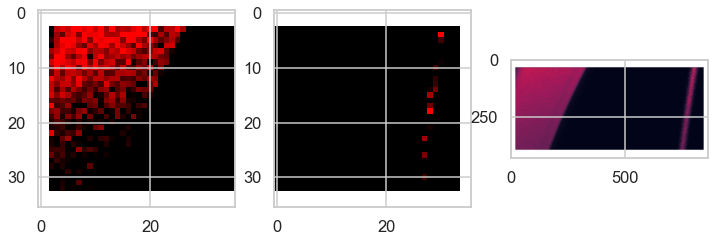

In [122]:
fig, ax = plt.subplots(figsize = (12,6), ncols=3)
ax[0].imshow(teste)
ax[1].imshow(teste2)
ax[2].imshow(normal)

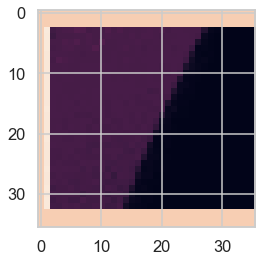

In [123]:
gray = cv2.cvtColor(teste, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize = (8,4))
ax.imshow(gray)

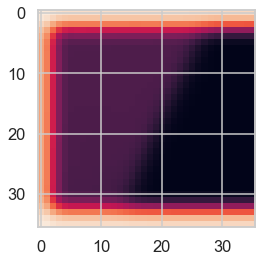

In [124]:
blur = cv2.GaussianBlur(gray, (7,7), 0)
fig, ax = plt.subplots(figsize = (8,4))
ax.imshow(blur)

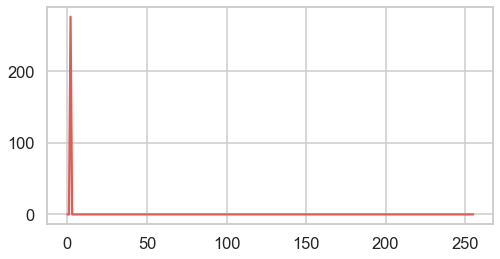

In [125]:

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(hist)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


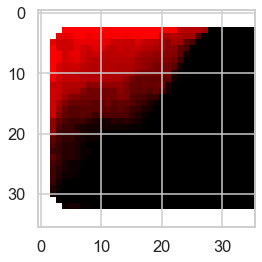

In [126]:
def remove_noise(image):
    return cv2.medianBlur(image,5)
semruido = remove_noise(teste)
fig, ax = plt.subplots(figsize = (8,4))
ax.imshow(semruido)

In [127]:
X_train_v1,X_test_v1,y_train_v1,y_test_v1 = train_test_split(left_half_X_to_train, rotulos, test_size = 0.3,random_state = 217)
X_train_v2,X_test_v2,y_train_v2,y_test_v2 = train_test_split(right_half_X_to_train, rotulos, test_size = 0.3,random_state = 217)

In [128]:
shape_1 = (X_train_v1[0].shape)
shape_2 = (X_train_v2[0].shape)

In [129]:
shape_1

(36, 36, 3)

In [130]:
y_train_v1 = np.array(y_train_v1)
y_train_v2 = np.array(y_train_v2)

y_test_v1 = np.array(y_test_v1)
y_test_v2 = np.array(y_test_v2)

X_train_v1 = np.reshape(X_train_v1,(-1,resolution[1],resolution[0],3))
X_train_v2 = np.reshape(X_train_v2,(-1,resolution[1],resolution[0],3))

X_test_v1 = np.reshape(X_test_v1,(-1,resolution[1],resolution[0],3))
X_test_v2 = np.reshape(X_test_v2,(-1,resolution[1],resolution[0],3))

In [131]:
# primeiro layer que recebe lado esquerdo do mapa
input_layer_v1 = Input(shape_1)
activation = "relu"
conv2d_layer_1_v1 = Conv2D(filters = 48, kernel_size = (8,8), strides = (3,3),activation=activation)(input_layer_v1)
avg2d_layer_1_v1 = AveragePooling2D(pool_size = (2,2))(conv2d_layer_1_v1)
batch_layer_1_v1 = BatchNormalization()(avg2d_layer_1_v1)

In [132]:
# primeiro layer que recebe lado direito do mapa
input_layer_v2 = Input(shape_2)
activation_v2 = "relu"
conv2d_layer_1_v2 = Conv2D(filters = 48, kernel_size = (8,8), strides = (3,3),activation=activation)(input_layer_v2)
avg2d_layer_1_v2 = AveragePooling2D(pool_size = (2,2))(conv2d_layer_1_v2)
batch_layer_1_v2 = BatchNormalization()(avg2d_layer_1_v2)


In [133]:
# concatenação do lado esquerdo e do lado direito
concat_layer = Concatenate()([batch_layer_1_v1,batch_layer_1_v2])

In [134]:
# camadas internas para extração de mapa de características mutuo
conv2d_intern = Conv2D(filters = 128, kernel_size = (4,4), strides = (1,1),activation=activation)(concat_layer)
#conv2d_intern = Conv2D(filters = 64, kernel_size = (2,2), strides = (1,1),activation=activation)(conv2d_intern)
maxpool_intern = GlobalMaxPool2D()(conv2d_intern)

#avg2d_layer_intern = AveragePooling2D(pool_size = (2,2))(conv2d_intern)

#batch_layer_intern = BatchNormalization()(avg2d_layer_intern)
#conv2d_intern_3 = Conv2D(filters =64, kernel_size = (1,1), strides = (2,2),activation=activation)(batch_layer_intern)
#global_intern = GlobalAveragePooling2D()(conv2d_intern_3)

In [135]:
# Camada de saída
flatten = Flatten()(maxpool_intern)
output = Dense(1)(flatten)


In [136]:
# modelo final
model = Model(inputs=[input_layer_v1,input_layer_v2], outputs = output)

In [137]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 36, 36, 3)]  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 36, 36, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 10, 10, 48)   9264        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 10, 10, 48)   9264        input_6[0][0]                    
____________________________________________________________________________________________

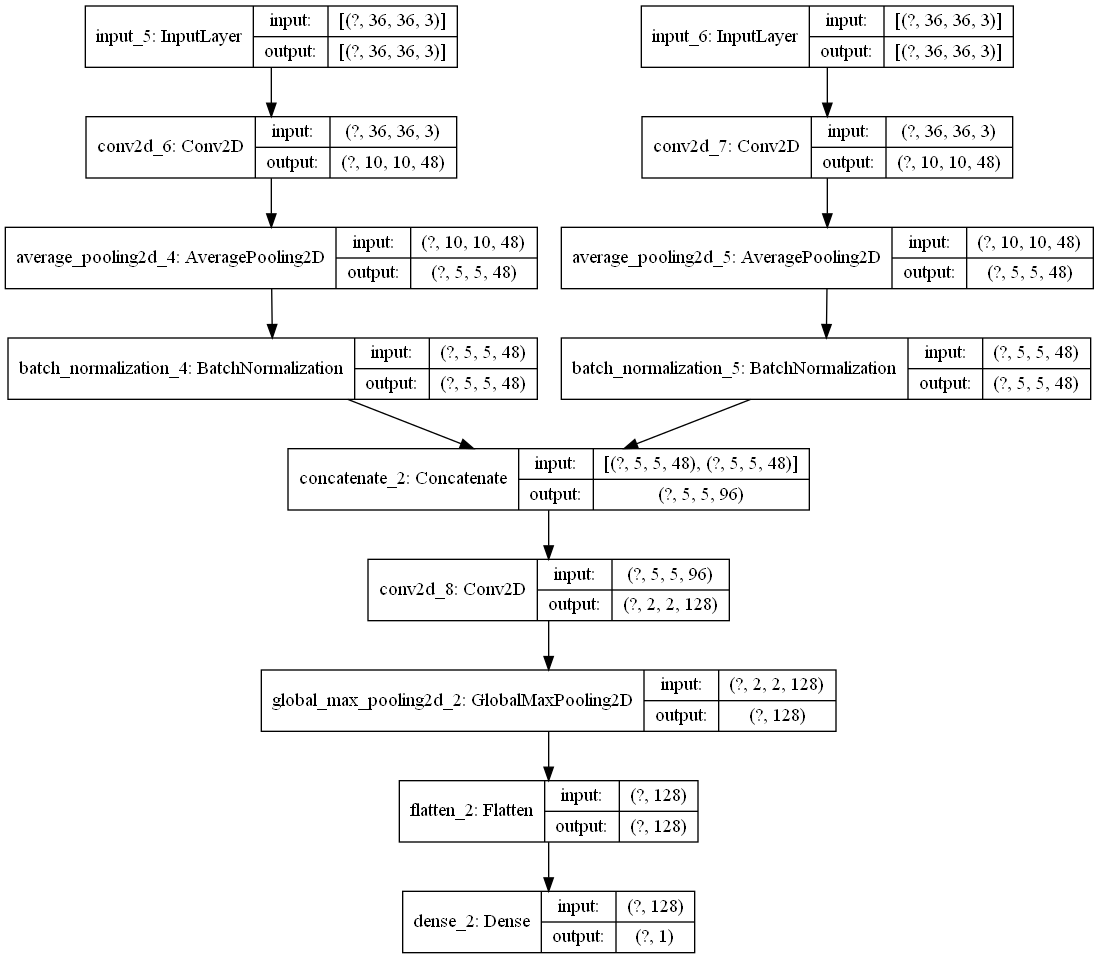

In [138]:
# plot model
plot_model(model,to_file = "resultados/model_architeture.png",show_shapes=True,expand_nested=True)

In [139]:
import tensorflow
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [140]:
# compila modelo e treina
epochs = 600
batch_size = 186
lr = 1e-4
decay = 1e-6
epsilon = 0.8

optimizer =Adam(learning_rate = lr,epsilon=epsilon,decay=decay)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
history = model.fit(x=[X_train_v1,X_train_v2],y=y_train_v1, batch_size = batch_size, epochs = epochs, verbose = 1,
                    
              callbacks=[ReduceLROnPlateau(patience=10),EarlyStopping(patience =40, verbose = 1),cp_callback],           
              validation_data = ([X_test_v1,X_test_v2],y_test_v1),shuffle = True)
                         #validation_split = 0.5,

Train on 648 samples, validate on 279 samples
Epoch 1/600
186/648 [=======>......................] - ETA: 1s - loss: 2368.1189 - mae: 41.3403 - mse: 2368.1189
Epoch 00001: saving model to training_1/cp.ckpt
648/648 [==============================] - 1s 2ms/sample - loss: 2098.7752 - mae: 38.2723 - mse: 2098.7754 - val_loss: 1915.2285 - val_mae: 36.7428 - val_mse: 1915.2285
Epoch 2/600
186/648 [=======>......................] - ETA: 0s - loss: 1950.6348 - mae: 35.9954 - mse: 1950.6348
Epoch 00002: saving model to training_1/cp.ckpt
648/648 [==============================] - 0s 228us/sample - loss: 1919.6370 - mae: 35.9322 - mse: 1919.6370 - val_loss: 1884.9937 - val_mae: 36.3377 - val_mse: 1884.9938
Epoch 3/600
186/648 [=======>......................] - ETA: 0s - loss: 1858.6155 - mae: 35.4417 - mse: 1858.6155
Epoch 00003: saving model to training_1/cp.ckpt
648/648 [==============================] - 0s 234us/sample - loss: 1756.4680 - mae: 33.8249 - mse: 1756.4680 - val_loss: 1854.7363 

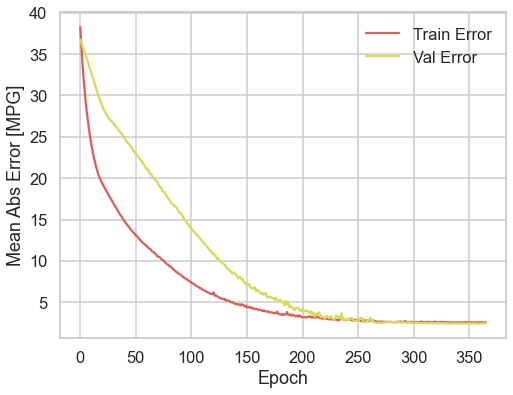

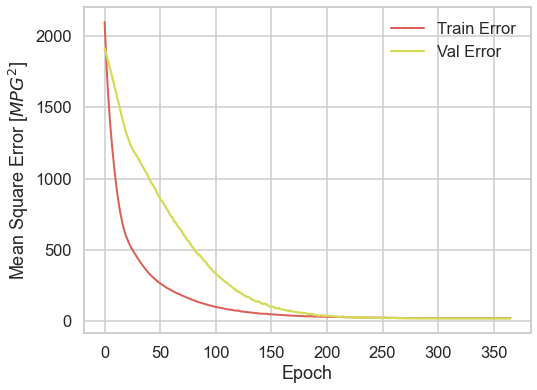

In [141]:
plot_history(history)

In [142]:
model.save('model_meis')

INFO:tensorflow:Assets written to: model_meis\assets


# ------------------ VALIDAÇÃO EXTRA ------------------

In [143]:
def check_map_2(data,model):
    prediction = model.predict([np.array(data['v1']),np.array(data['v2'])])
    return prediction

In [144]:
data_valid = {'v1': left_half_X_valid, 'v2': right_half_X_valid}
preds = check_map_2(data_valid,model)
preds_0 = preds.flatten()

Text(0.5, 0, 'Diferença pred e real')

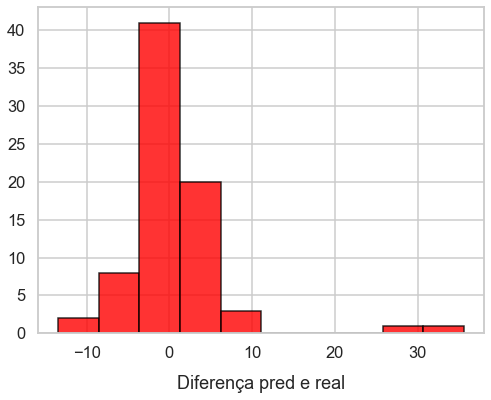

In [145]:
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(preds_0 - rotulos_valid, alpha = 0.8, color = 'r', edgecolor = 'black')
ax.set_xlabel("Diferença pred e real", labelpad = 14)

Text(0, 0.5, 'Valor real')

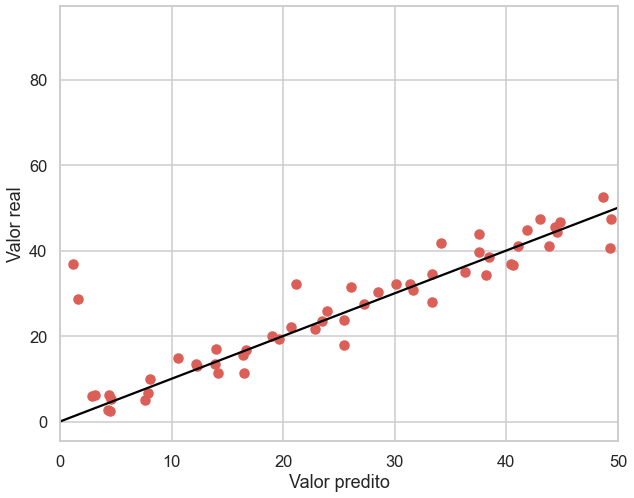

In [146]:
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(rotulos_valid, preds)
ax.plot(np.arange(0,max(preds),1),np.arange(0,max(preds),1), color = 'black')
ax.set_xlim(0,50)
ax.set_xlabel("Valor predito")
ax.set_ylabel("Valor real")

# ------------------- VALIDAÇÃO EM MAPAS REAIS --------------------

In [147]:
data_real = {'v1': left_half_X_real, 'v2': right_half_X_real}
preds_reais = check_map_2(data_real, model).flatten()

Predição: [49.35056  46.44093  37.323605 40.45604 ]
Espessura real: [52.0, 48.0, 40.0, 41.0]


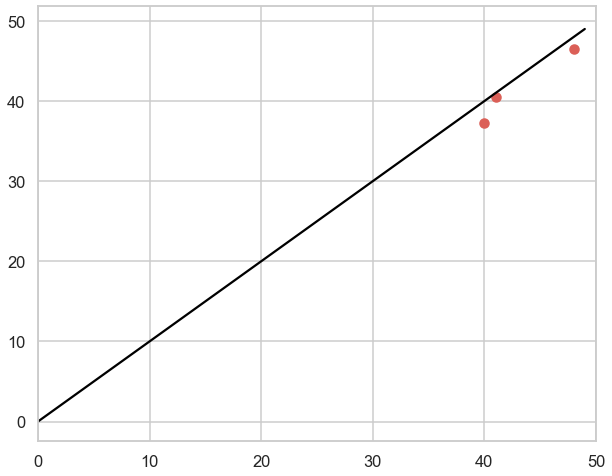

In [148]:
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(rotulos_real, preds_reais)
ax.plot(np.arange(0,max(preds_reais),1),np.arange(0,max(preds_reais),1), color = 'black')
ax.set_xlim(0,50)
print(f"Predição: {preds_reais}")
print(f"Espessura real: {rotulos_real}")

# ------------------------------ Visualização dos mapas de características ----------------------

In [149]:
layer_names = [layer.name for layer in model.layers]

In [150]:
layer_names

['input_5',
 'input_6',
 'conv2d_6',
 'conv2d_7',
 'average_pooling2d_4',
 'average_pooling2d_5',
 'batch_normalization_4',
 'batch_normalization_5',
 'concatenate_2',
 'conv2d_8',
 'global_max_pooling2d_2',
 'flatten_2',
 'dense_2']

In [151]:
layer_outputs = [layer.output for layer in model.layers]


In [152]:
layer_outputs

[<tf.Tensor 'input_5:0' shape=(None, 36, 36, 3) dtype=float32>,
 <tf.Tensor 'input_6:0' shape=(None, 36, 36, 3) dtype=float32>,
 <tf.Tensor 'conv2d_6/Identity:0' shape=(None, 10, 10, 48) dtype=float32>,
 <tf.Tensor 'conv2d_7/Identity:0' shape=(None, 10, 10, 48) dtype=float32>,
 <tf.Tensor 'average_pooling2d_4/Identity:0' shape=(None, 5, 5, 48) dtype=float32>,
 <tf.Tensor 'average_pooling2d_5/Identity:0' shape=(None, 5, 5, 48) dtype=float32>,
 <tf.Tensor 'batch_normalization_4/Identity:0' shape=(None, 5, 5, 48) dtype=float32>,
 <tf.Tensor 'batch_normalization_5/Identity:0' shape=(None, 5, 5, 48) dtype=float32>,
 <tf.Tensor 'concatenate_2/Identity:0' shape=(None, 5, 5, 96) dtype=float32>,
 <tf.Tensor 'conv2d_8/Identity:0' shape=(None, 2, 2, 128) dtype=float32>,
 <tf.Tensor 'global_max_pooling2d_2/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'flatten_2/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_2/Identity:0' shape=(None, 1) dtype=float32>]

In [153]:
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

In [154]:
data = {'v1': left_half_X_valid, 'v2': right_half_X_valid}
feature_maps =feature_map_model.predict([np.array(data['v1']),np.array(data['v2'])]) # Returns a list of five Numpy arrays: one array per layer activation

In [155]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(f" Layer shape : {layer_name} =======>> {feature_map.shape}")

 Layer shape : input_5 =======>> (76, 36, 36, 3)
 Layer shape : input_6 =======>> (76, 36, 36, 3)
 Layer shape : conv2d_6 =======>> (76, 10, 10, 48)
 Layer shape : conv2d_7 =======>> (76, 10, 10, 48)
 Layer shape : average_pooling2d_4 =======>> (76, 5, 5, 48)
 Layer shape : average_pooling2d_5 =======>> (76, 5, 5, 48)
 Layer shape : batch_normalization_4 =======>> (76, 5, 5, 48)
 Layer shape : batch_normalization_5 =======>> (76, 5, 5, 48)
 Layer shape : concatenate_2 =======>> (76, 5, 5, 96)
 Layer shape : conv2d_8 =======>> (76, 2, 2, 128)
 Layer shape : global_max_pooling2d_2 =======>> (76, 128)
 Layer shape : flatten_2 =======>> (76, 128)
 Layer shape : dense_2 =======>> (76, 1)


(76, 36, 36, 3)
(76, 36, 36, 3)
(76, 10, 10, 48)
(76, 10, 10, 48)
(76, 5, 5, 48)
(76, 5, 5, 48)
(76, 5, 5, 48)
(76, 5, 5, 48)
(76, 5, 5, 96)
(76, 2, 2, 128)

C:\Users\lucas\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]



(76, 128)
(76, 128)
(76, 1)


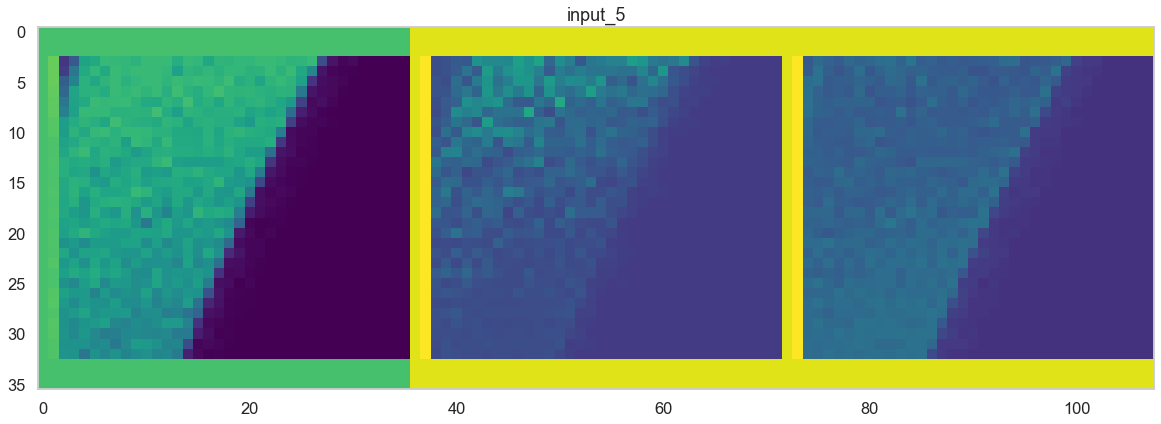

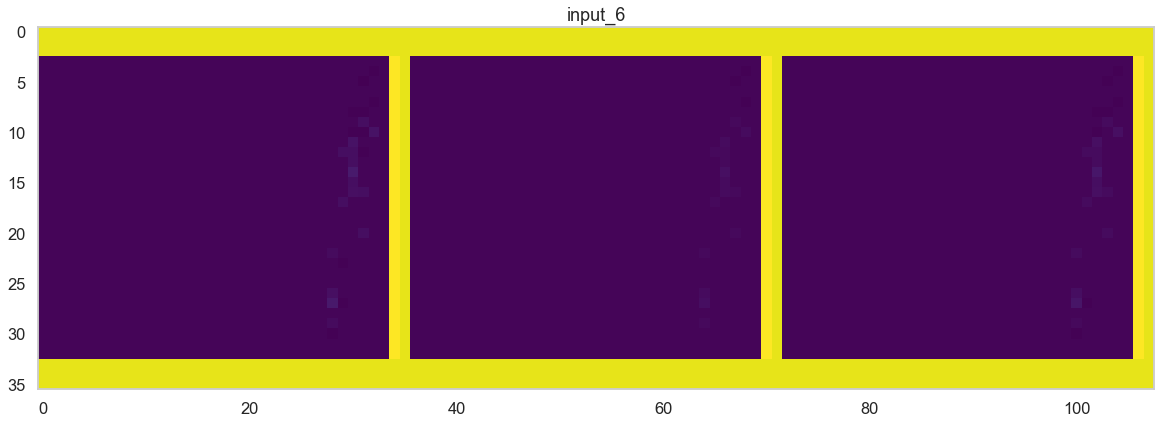

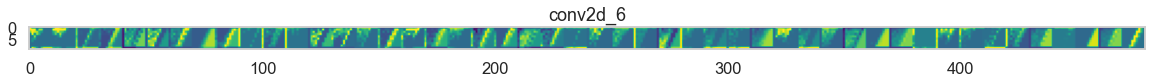

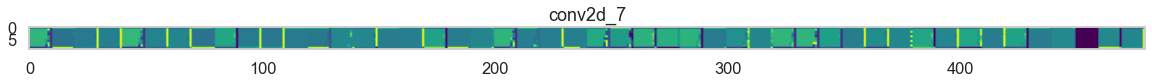

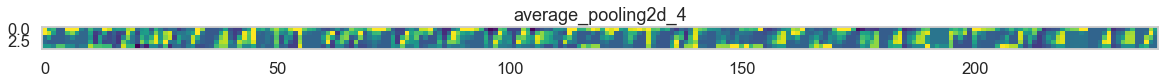

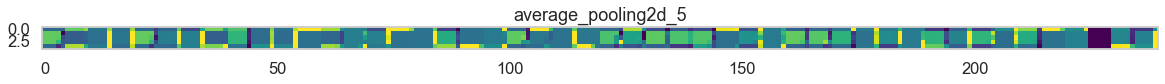

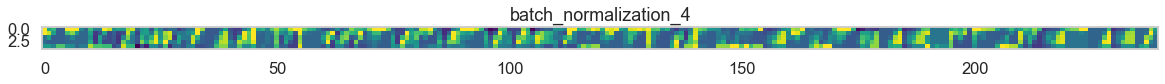

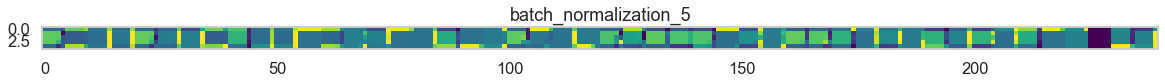

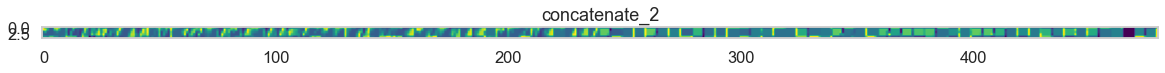

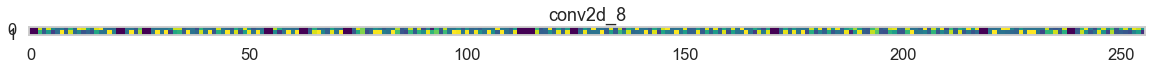

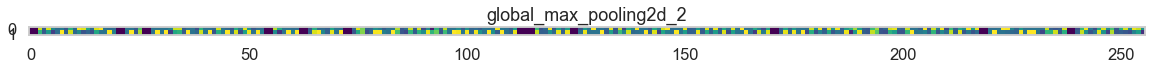

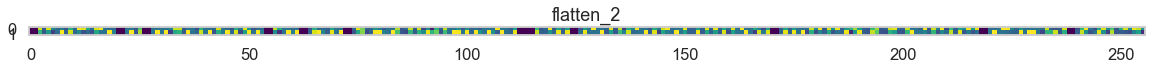

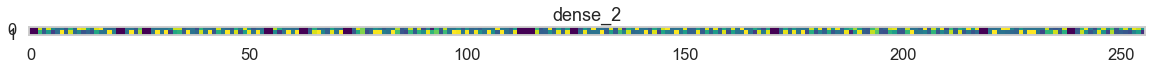

In [156]:
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:

        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
    
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
        
            display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    #plt.figure(figsize = (4,2))
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [157]:
feature_map.shape

(76, 1)

In [158]:
print("Tempo total de execução: {:.2f} segundos!".format(time.time() - start))

Tempo total de execução: 106.08 segundos!


In [159]:
import session_info
session_info.show()